<a href="https://colab.research.google.com/github/orion-gamma-kplr/MachineLLearning/blob/main/FR/Supervised/classification/04_Decision_Trees_Cancer_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> **Arbres de décision** </center>

Ils sont utilisés pour l'apprentissage supervisé pour les tâches de classification et de régression.

* https://scikit-learn.org/stable/modules/tree.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Install Graphviz module
%sh```
sudo pip3 install graphviz
sudo yum install graphviz
```

In [10]:
#!pip install graphviz
!pip install mglearn
!pip install sklearn
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Feature importances: [0. 1.]


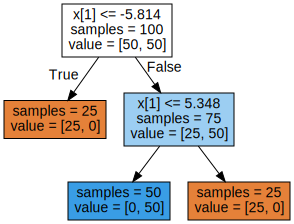

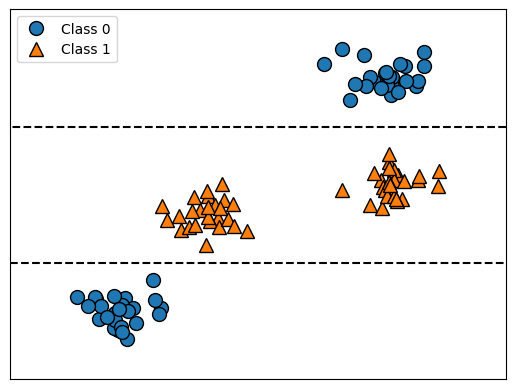

In [11]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

mglearn.plots.plot_tree_not_monotone()

In [19]:
from re import X
from pprint import pprint
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from pandas import pandas as pd

cancer = load_breast_cancer()
pprint(cancer)
X=pd.DataFrame(cancer["data"],columns=cancer["feature_names"])
y=cancer["target"]

{'DESCR': '.. _breast_cancer_dataset:\n'
          '\n'
          'Breast cancer wisconsin (diagnostic) dataset\n'
          '--------------------------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 569\n'
          '\n'
          '    :Number of Attributes: 30 numeric, predictive attributes and '
          'the class\n'
          '\n'
          '    :Attribute Information:\n'
          '        - radius (mean of distances from center to points on the '
          'perimeter)\n'
          '        - texture (standard deviation of gray-scale values)\n'
          '        - perimeter\n'
          '        - area\n'
          '        - smoothness (local variation in radius lengths)\n'
          '        - compactness (perimeter^2 / area - 1.0)\n'
          '        - concavity (severity of concave portions of the contour)\n'
          '        - concave points (number of concave portions of the '
       

#### Créer et tester le modèle :
1. Diviser les données.
2. Instanciez le classificateur d'arbre de décision avec les paramètres par défaut..

In [22]:
from sklearn.model_selection import train_test_split
cancerX_train,cancerX_test,cancery_train,cancery_test=train_test_split(X,y,train_size=0.8,random_state=101)
tree=DecisionTreeClassifier()
tree.fit(cancerX_train, cancery_train)
# Fill Here

DecisionTreeClassifier()

#### Evaluer le Modèle :

In [25]:
pprint(tree.score(cancerX_train,cancery_train))

1.0


**Avertissement :**
Une précision de 1,00 signifie que toutes les feuilles sont pures. La ramification de l'arbre est donc descendue jusqu'à ce que l'algorithme puisse mémoriser et ajuster toutes les étiquettes.
jusqu'à ce que l'algorithme puisse mémoriser et ajuster toutes les étiquettes.
Il s'agit d'un overfitting. Cela se produit parce que l'arbre de décision n'était pas limité
et est descendu jusqu'à ce qu'il s'adapte parfaitement aux données d'apprentissage.

Pour éviter l'Overfitting, nous appliquons des restrictions pour limiter la profondeur de l'arbre de décision, ce qui à son tour va limiter sa complexité.

Technique d'élagage :

Il existe deux types d'élagage, pré et post.
- Avec l'élagage précoce, nous arrêtons la création de l'arbre à un stade plus précoce. Ainsi, nous pouvons limiter :
1. la profondeur de l'arbre,
2. le nombre maximal de feuilles,
3. spécifier un minimum de points pour un nœud afin de pouvoir effectuer de nouvelles divisions.
En limitant la profondeur de l'arbre, nous limitons le nombre de questions pouvant être posées.

- Avec l'élagage postérieur, une fois l'arbre créé, nous pouvons supprimer les branches ou nœuds non pertinents qui contiennent peu d'informations.

#### Essayons d'améliorer la précision avec du fine tuning : (max_depth) :

In [27]:
# Fill here

# It should increases the accuracy over the test data.
for depth in range(1,10):
  tree=DecisionTreeClassifier(max_depth=depth)
  tree.fit(cancerX_train, cancery_train)
  print(f"max_depth {depth} score {tree.score(cancerX_train,cancery_train)}")

max_depth 1 score 0.9230769230769231
max_depth 2 score 0.9582417582417583
max_depth 3 score 0.9692307692307692
max_depth 4 score 0.9824175824175824
max_depth 5 score 0.989010989010989
max_depth 6 score 0.9978021978021978
max_depth 7 score 1.0
max_depth 8 score 1.0
max_depth 9 score 1.0


!#### Evaluer l'Algorithme :

In [30]:
  tree=DecisionTreeClassifier(max_depth=6)
  tree.fit(cancerX_train, cancery_train)
  pprint(tree.score(cancerX_train,cancery_train))

0.9978021978021978


In [34]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
               impurity=False, filled=True)

In [36]:
!dot -Tpng cancertree.dot -o cancertree.png

### Transformer .dot à .png
```
!dot -Tpng cancertree.dot -o cancertree.png
```
- Le rayon de la tumeur se trouve au sommet de l'arbre, ce qui nous amène à réfléchir à l'importance de cette caractéristique.

![](https://github.com/kplr-training/Machine-Learning/blob/main/01-SUPERVISED/02.CLASSIFICATION/cancertree.png?raw=1)

![](https://github.com/kplr-training/Machine-Learning/blob/main/01-SUPERVISED/02.CLASSIFICATION/cancertree_all.png?raw=1)

- Nous pouvons utiliser une propriété de l'arbre de décision appelée importance des caractéristiques "feature importances".
- Elle nous indique le poids de chaque caractéristique dans la prise de décision.
- Ainsi, chaque caractéristique
i attribue zéro et un.
- 0 signifie que la caractéristique n'est pas utilisée dans le processus de décision
tandis que 1 signifie qu'elle prédit parfaitement la cible 'target'.

In [37]:
pprint("Feature importances: {}".format(tree.feature_importances_))

('Feature importances: [0.         0.         0.         0.00721895 0.01421231 '
 '0.\n'
 ' 0.01421231 0.         0.         0.         0.01416753 0.\n'
 ' 0.         0.01444338 0.         0.         0.         0.\n'
 ' 0.00852738 0.04007407 0.03755538 0.01331037 0.         0.10205645\n'
 ' 0.         0.         0.01658102 0.71764086 0.         0.        ]')


In [33]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Une meilleure façon de procéder :
- Nous pouvons voir que la caractéristique la plus importante est le 'worst radius', qui se trouve, comme nous l'avons vu précédemment, au sommet de l'arbre.

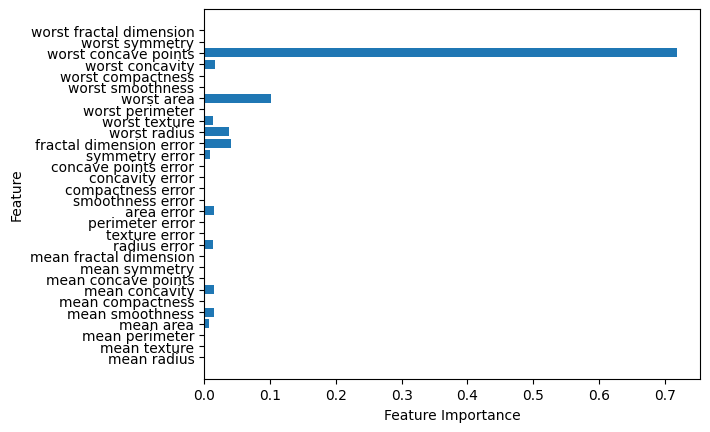

In [38]:
import numpy as np

n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Avantages des arbres de décision

 - Facile à visualiser et à comprendre.
 - Contrairement à d'autres algorithmes de classification par apprentissage automatique, il n'est pas nécessaire de prétraiter, de normaliser, de mettre à l'échelle et/ou de standardiser les caractéristiques.

### Paramètres à utiliser

 - max_depth,
 - min_samples_leaf, max_samples_leaf,
 - max_leaf_nodes,
 - etc.

### Principaux inconvénients

- Tendance à l'overfitting, même si l'on crée un arbre d'élagage.
- Mauvaise généralisation.

##### => Contournement possible : de nombreux parittioners d'apprentissage automatique utilisent des ensembles d'arbres de décision.